# Making the new dataframe

In [2]:
#Loading modules

!pip install deepchem

import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Features
from rdkit.Chem import Fragments
from rdkit.Chem import rdMolDescriptors
import tensorflow as tf

import pandas as pd

from matplotlib import pyplot as plt

import numpy as np

from sklearn import metrics
from sklearn.metrics import f1_score

import warnings

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 46.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jax 0.4.20 requires scipy>=1.9, but you have scipy 1.8.1 which is incompatible.
jaxlib 0.4.20+cuda12.cudnn89 requires scipy>=1.9, but you have scipy 1.8.1 which is incompatible.


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


Found GPU at: /device:GPU:0


In [3]:
#Loading the datasets
datasets = dc.molnet.load_tox21(featurizer='GraphConv', splitter='random')

[10:04:53] WARNING: not removing hydrogen atom without neighbors


In [4]:
tasks, datasets, transformers = datasets

In [5]:
#Transforming dataset into a pandas dataframe
train_dataset, valid_dataset, test_dataset = datasets

train_df = train_dataset.to_dataframe()
test_dataset = test_dataset.to_dataframe()
valid_dataset = valid_dataset.to_dataframe()

#This line concatenates all the dataframes, we will resplit them later with SKLEARN
dataset = pd.concat([train_df, test_dataset, valid_dataset])

dataset

,X,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,w4,w5,w6,w7,w8,w9,w10,w11,w12,ids
0,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.052834,1.150233,1.055587,1.030539,1.198918,1.036806,1.061304,1.188187,1.06647,CCCCCCOC(C)=O
1,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.052834,1.150233,1.055587,1.030539,1.198918,1.036806,1.061304,0.000000,1.06647,COc1cc(S(=O)(=O)Nc2ccccc2)c(OC)cc1N
2,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.052834,1.150233,1.055587,1.030539,1.198918,1.036806,1.061304,0.000000,1.06647,O=S(=O)([O-])c1cc(S(=O)(=O)[O-])c2c(/N=N/c3ccc...
3,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.052834,7.656347,1.055587,1.030539,1.198918,1.036806,1.061304,1.188187,1.06647,CN1[C@H]2C[C@H](OC(=O)[C@H](CO)c3ccccc3)C[C@@H...
4,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,18.989761,0.000000,0.000000,1.036806,0.000000,6.313859,0.00000,ClC1=C(Cl)C2(Cl)C3C(Cl)C(Cl)CC3C1(Cl)C2(Cl)Cl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.052834,1.150233,1.055587,1.030539,1.198918,1.036806,1.061304,1.188187,1.06647,COC(=O)CC(C)=O
779,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.052834,1.150233,1.055587,1.030539,1.198918,1.036806,1.061304,1.188187,1.06647,O=Cc1cccc(Br)c1
780,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.052834,1.150233,1.055587,1.030539,1.198918,1.036806,1.061304,1.188187,1.06647,ClC=CCl
781,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.052834,7.656347,1.055587,1.030539,1.198918,1.036806,1.061304,1.188187,1.06647,Cc1ccccc1N


In [6]:
#Selecting only the SMILES and y1-y7 columns

dataset = dataset[['ids', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7']]

#Adding two columns, the first will sum all toxicity values
#The second will be a binary classification of if it is toxic or not depending on if tox is >0

dataset['tox'] = dataset.sum(axis=1)

<ipython-input-6-bbf68f29d096>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset['tox'] = dataset.sum(axis=1)
<ipython-input-6-bbf68f29d096>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['tox'] = dataset.sum(axis=1)


In [7]:
#This is a featurisation function, it takes the SMILES and returns the features e.g toxic functional groups, total halogens, heavy atoms (> 10 ATOMIC NUMBER - ie >Ne)


def create_dataset(dataset):
    #This takes each of the SMILES strings in the dataset
    SMILES_strings = dataset['ids']

    #This converts the SMILES strings into RDKit molecules - from which we can extract the features
    mol = [Chem.MolFromSmiles(formula) for formula in SMILES_strings]

    #This extracts the functional groups that are known to have a high toxicity
    def toxic_functional_groups(formula):
        total = 0
        total += Chem.Fragments.fr_ArN(formula)
        total += Chem.Fragments.fr_Al_COO(formula)
        total += Chem.Fragments.fr_Ar_COO(formula)
        total += Chem.Fragments.fr_Ar_OH(formula)
        total += Chem.Fragments.fr_nitro_arom(formula)
        total += Chem.Fragments.fr_C_S(formula)
        total += Chem.Fragments.fr_epoxide(formula)

        return total

    #This counts the number of halogens
    def total_halogens(formula):
        return Chem.Fragments.fr_halogen(formula)

    #This counts the number of heavy atoms
    def total_heaviest_atoms(formula):
        count = 0
        for atom in formula.GetAtoms():
            if atom.GetAtomicNum() > 10:
                count += 1

        return count


    #Theses variables will hold the features while we put them in the dataframe.
    #The [Chem.rdMol...] is called a list comprehension
    # It will iterate through each 'formula' (SMILES string) in the 'mol' and add
    # the feature 'Chem.rdMolDescriptors.{FEATURE}(formula)' to the list.
    mol_wts = [Chem.rdMolDescriptors.CalcExactMolWt(formula) for formula in mol]
    log_p = [Chem.rdMolDescriptors.CalcCrippenDescriptors(formula)[0] for formula in mol]
    h_bond_acceptors = [Chem.rdMolDescriptors.CalcNumHBA(formula) for formula in mol]
    h_bond_donors = [Chem.rdMolDescriptors.CalcNumHBD(formula) for formula in mol]
    rot_bond = [Chem.rdMolDescriptors.CalcNumRotatableBonds(formula) for formula in mol]
    toxic_grp = [toxic_functional_groups(formula) for formula in mol]
    total_hal = [total_halogens(formula) for formula in mol]
    heaviest_at = [total_heaviest_atoms(formula) for formula in mol]


    #This function takes all the above lists and puts them in a dataframe.
    df = pd.DataFrame(data={'SMILES':SMILES_strings,
                                'mol_wts': mol_wts,
                                'log_p': log_p,
                                'h_bond_acceptors': h_bond_acceptors,
                                'h_bond_donors':h_bond_donors,
                                'rot_bond':rot_bond,
                                'toxic_grp':toxic_grp,
                                'total_hal':total_hal,
                                'total_heaviest_atoms':heaviest_at,
                                'tox': dataset['tox']
                                })

    return df

In [8]:
#Calls the above function on the dataset
featurised_df = create_dataset(dataset)

featurised_df

[10:05:30] WARNING: not removing hydrogen atom without neighbors


,SMILES,mol_wts,log_p,h_bond_acceptors,h_bond_donors,rot_bond,toxic_grp,total_hal,total_heaviest_atoms,tox
0,CCCCCCOC(C)=O,144.115030,2.12980,2,0,5,0,0,0,0.0
1,COc1cc(S(=O)(=O)Nc2ccccc2)c(OC)cc1N,308.083078,2.08680,5,2,5,1,0,1,0.0
2,O=S(=O)([O-])c1cc(S(=O)(=O)[O-])c2c(/N=N/c3ccc...,405.994040,2.76900,9,1,4,1,0,2,0.0
3,CN1[C@H]2C[C@H](OC(=O)[C@H](CO)c3ccccc3)C[C@@H...,303.147058,0.91810,5,1,4,1,0,0,1.0
4,ClC1=C(Cl)C2(Cl)C3C(Cl)C(Cl)CC3C1(Cl)C2(Cl)Cl,405.797772,5.68280,0,0,0,0,8,8,1.0
...,...,...,...,...,...,...,...,...,...,...
778,COC(=O)CC(C)=O,116.047344,0.13850,3,0,2,0,0,0,0.0
779,O=Cc1cccc(Br)c1,183.952377,2.26160,1,0,1,0,1,1,0.0
780,ClC=CCl,95.953355,1.93520,0,0,0,0,2,2,0.0
781,Cc1ccccc1N,107.073499,1.57722,1,1,0,1,0,0,1.0


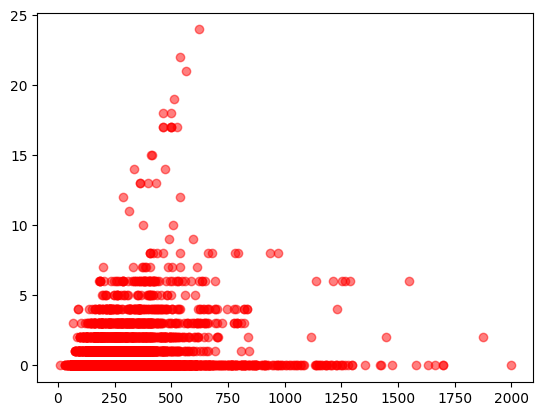

In [9]:
plt.plot(featurised_df['mol_wts'], featurised_df['total_hal'], 'o', c='r', alpha=0.5)

In [10]:
#Next we need to split the dataset into a test and train using Sklearn

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(featurised_df, test_size=0.2)


In [11]:
#This function will save our figure to a file
from pathlib import Path

IMG_PATH = Path() / 'figures'


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = IMG_PATH / f'{fig_id}.{fig_extension}'
    if tight_layout:
        plt.tight_layout()

    plt.savefig(path, format=fig_extension, dpi=resolution)


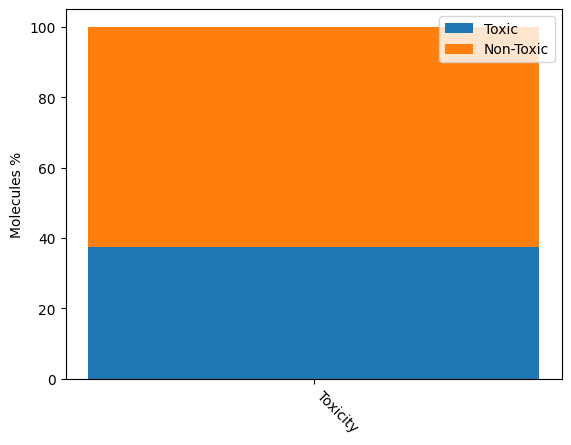

In [12]:
#Lets take a look at train_df and see what it looks like
#This code will determine the % of toxic molecules in the training dataset:

percent_toxic = 100*sum(train_df['tox'])/len(train_df)
percent_non_toxic = 100-percent_toxic

#Lets plot the train_df as a stacked bar graph:
ax=plt.bar('Toxicity',percent_toxic, label='Toxic')
plt.bar('Toxicity',percent_non_toxic, bottom= percent_toxic, label='Non-Toxic')
plt.xticks(rotation=-45, ha='left')
plt.ylabel("Molecules %")
plt.legend()



In [13]:
#As we can see, the dataset is still slightly skewed but looking better than previously. Lets try to do a
#PCA on the dataset

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#We first need to scale the data e.g Mol weight can be v.high but log_p can be v.low (even negative)
X = train_df[['mol_wts', 'log_p', 'h_bond_acceptors', 'h_bond_donors', 'rot_bond', 'toxic_grp', 'total_hal', 'total_heaviest_atoms']]
X_scaled = StandardScaler().fit_transform(X)

#Next lets fit our PCA
pca = PCA(n_components=8)
principle_components = pca.fit_transform(X_scaled)

#This will put the PCA components into a dataframe
PCA_components = pd.DataFrame(principle_components)

([<matplotlib.axis.XTick at 0x79684b076650>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

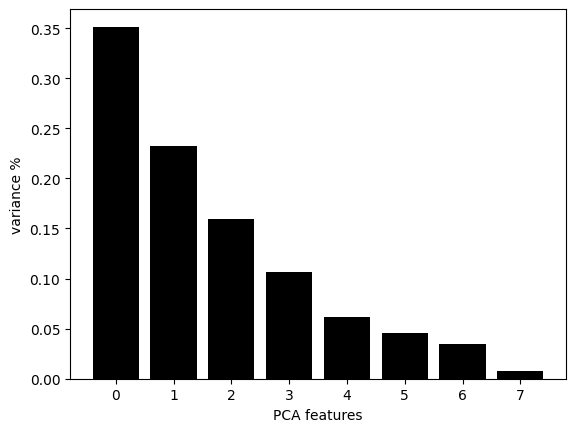

In [14]:
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

#save_fig('tox21_pca_unscaled')

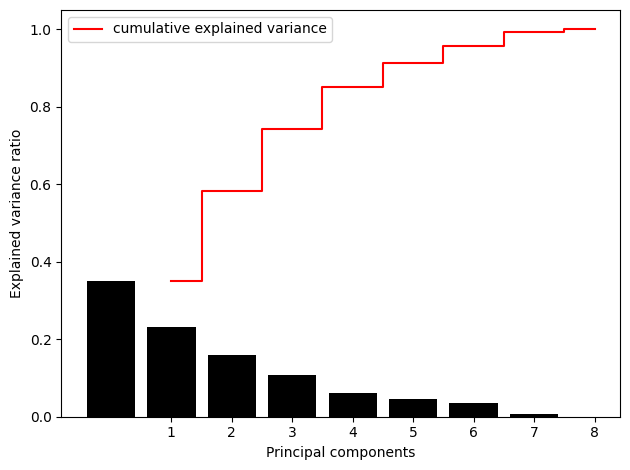

In [15]:
# And lets plot the cumulative varience:

def plot_cum_var (pca):
    cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
    plt.bar(features, pca.explained_variance_ratio_, color='black')
    plt.step(range(1, 9), cum_var_exp, where='mid', label='cumulative explained variance', color='red')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.xticks(range(1, 9))
    plt.legend(loc='best')
    plt.tight_layout()

plot_cum_var(pca)
#save_fig('tox21_cum_var_exp')

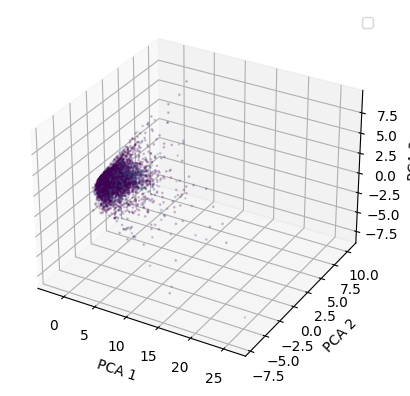

In [16]:
#It looks like we can explain over 80% of the variance in the dataset with PCA[0] to PCA[4]
#Lets plot it

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
markers = ['o', '^']


ax.scatter(PCA_components[0], PCA_components[1], PCA_components[2], c=train_df['tox'], cmap='viridis', s=1, alpha=0.2)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.legend()

In [17]:
#Hmm that doesnt seem to have helped...
#The points are all grouped and don't seem to follow any pattern.

#Perhaps we are suffering from an unbalanced dataset?

from sklearn.utils import resample

df_majority = train_df[train_df.tox==0]
df_minority = train_df[train_df.tox==1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples= int(percent_non_toxic*len(train_df)/100))

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled

,SMILES,mol_wts,log_p,h_bond_acceptors,h_bond_donors,rot_bond,toxic_grp,total_hal,total_heaviest_atoms,tox
501,CCOCCOCC,118.099380,1.05940,2,0,5,0,0,0,0.0
900,O=C([O-])[O-].[Sr+2],147.890356,-2.82780,3,0,0,0,0,1,0.0
1586,Nc1ccc(S(=O)(=O)Nc2ncccn2)cc1,250.052447,0.85960,5,2,3,1,0,1,0.0
5667,N=C(N)NCCCC[C@@H]1NC(=O)CCSSC[C@@H](C(N)=O)NC(...,831.315614,-1.84473,11,11,10,1,0,2,0.0
284,Cn1c(CCCC(=O)O)nc2cc(N(CCCl)CCCl)ccc21,357.101082,3.26460,4,1,9,1,2,2,0.0
...,...,...,...,...,...,...,...,...,...,...
5679,COP(=O)(OC)O/C(=C\Cl)c1cc(Cl)c(Cl)cc1Cl,363.899256,5.60150,4,0,5,0,4,5,1.0
1384,CCN(CC)CCOc1ccc(-c2nc3cc(Cl)ccc3s2)cc1,360.106312,5.33730,4,0,7,0,1,2,1.0
1649,O=S(O)CO[Na],117.970059,-0.73430,2,1,2,0,0,2,1.0
1856,O=C(O)c1ccc2ccccc2c1O.OCc1cc(C(O)CNCCCCCCOCCCC...,603.319603,6.35100,7,6,17,3,0,0,1.0


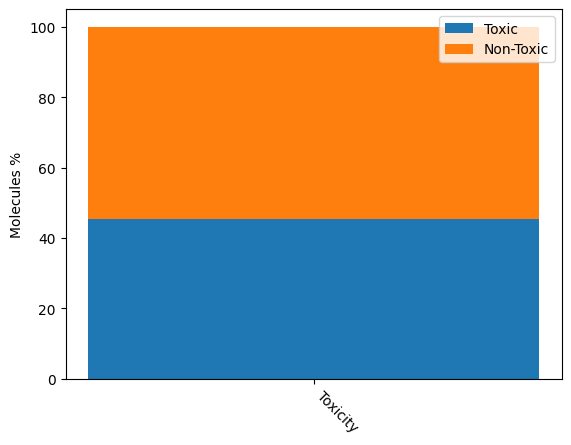

In [18]:
percent_toxic = 100*sum(df_upsampled['tox'])/len(df_upsampled)
percent_non_toxic = 100-percent_toxic

#Lets plot the train_df as a stacked bar graph:
ax=plt.bar('Toxicity',percent_toxic, label='Toxic')
plt.bar('Toxicity',percent_non_toxic, bottom= percent_toxic, label='Non-Toxic')
plt.xticks(rotation=-45, ha='left')
plt.ylabel("Molecules %")
plt.legend()

#save_fig('train_dataset_percent_toxicity')

In [19]:
#That's better, lets try our PCA again on our upsampled dataset

X = df_upsampled[['mol_wts', 'log_p', 'h_bond_acceptors', 'h_bond_donors', 'rot_bond', 'toxic_grp', 'total_hal', 'total_heaviest_atoms']]
X_scaled_up = StandardScaler().fit_transform(X)

#Next lets fit our PCA
pca = PCA(n_components=8)
principle_components = pca.fit_transform(X_scaled_up)

#This will put the PCA components into a dataframe
PCA_components = pd.DataFrame(principle_components)
PCA_components

,0,1,2,3,4,5,6,7
0,-1.120247,-0.786641,0.467084,-0.531145,0.062634,0.548221,-0.394606,0.017242
1,-1.122776,-1.449880,-1.245314,-1.224629,-0.542176,0.230506,-0.736307,0.641331
2,0.399522,-0.812252,-0.699338,0.228961,-0.499413,0.052648,-0.055087,-0.087716
3,6.064265,-0.964576,-1.682329,-1.051513,-0.108259,0.260640,1.980950,0.782667
4,0.771412,1.476396,-0.467698,0.524227,-0.218742,0.773720,-0.338416,0.055224
...,...,...,...,...,...,...,...,...
8628,-0.026843,4.162121,-1.936905,-0.457028,-1.039285,0.255645,0.083854,-0.484337
8629,0.054906,1.828933,0.445812,-0.239578,-0.692789,-0.090394,0.036436,-0.201805
8630,-1.003543,-0.601377,-1.164830,-1.003070,-0.975947,0.702446,0.117036,0.194403
8631,4.269101,0.273897,1.413229,2.969622,0.289430,0.884534,0.893548,-0.231766


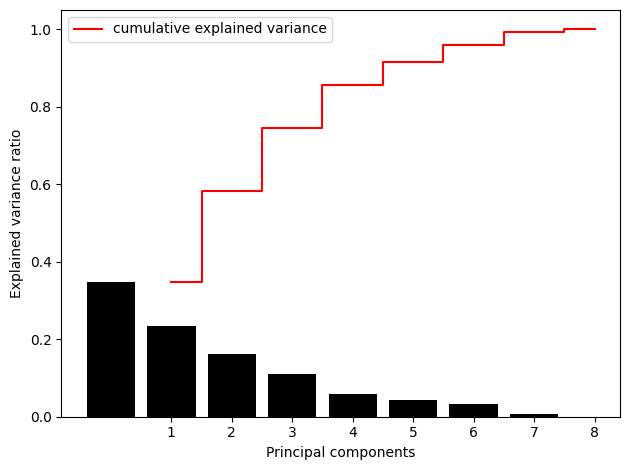

In [20]:
plot_cum_var(pca)
#save_fig('pca_upsampled')

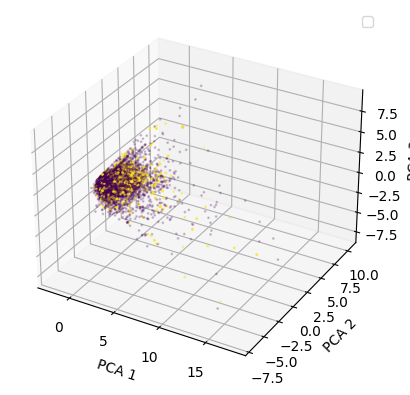

In [21]:
#As we can see, the dataset is still slightly skewed but looking better than previously. Lets try to do a plot:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


ax.scatter(PCA_components[0], PCA_components[1], PCA_components[2], c=df_upsampled['tox'], cmap='viridis', s=1, alpha=0.2)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.legend()

In [22]:
#Doesnt look much better :(
#Lets try to fit a simplple SGD classifier (support vector machine) - a type of linear regression that can be used for classification


from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(PCA_components, df_upsampled['tox'])

SGDClassifier()

In [23]:
#now lets test it using cross validation

from sklearn.model_selection import cross_val_score

cross_val_score(sgd, PCA_components, df_upsampled['tox'], cv=5, scoring='accuracy')

array([0.62825709, 0.61146497, 0.59756804, 0.60544612, 0.60254925])

In [24]:
#These dont look great (1 is ideal)
#lets compare it to a random classifier:

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(PCA_components, df_upsampled['tox'])


DummyClassifier()

In [25]:
cross_val_score(dummy_clf, PCA_components, df_upsampled['tox'], cv=5, scoring='accuracy')

array([0.54661262, 0.54661262, 0.54661262, 0.54692932, 0.54634994])

In [26]:
#Okay we are slightly above a random classifier which has a 54% accuracy - reflecting the 54% bias
#lets dig a little deeper into whats going on:

from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd, PCA_components, df_upsampled['tox'], cv=5, method='decision_function')

precisions, recalls, thresholds = precision_recall_curve(df_upsampled['tox'], y_scores)

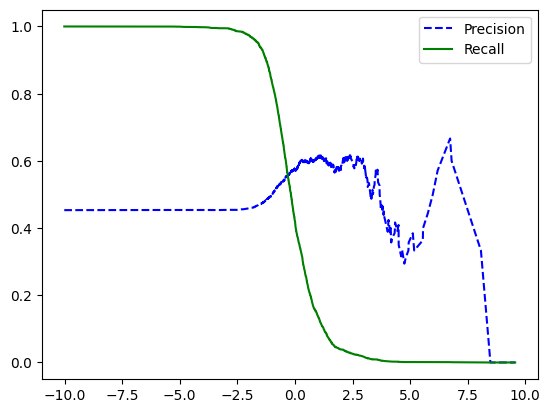

In [27]:
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.legend()

In [28]:
from sklearn.metrics import f1_score

f1_score(df_upsampled['tox'], y_scores>0)

0.4859757897844701

In [29]:
#This is just some code that gets the input shape of the dataset
input_shape = train_df[['mol_wts', 'log_p', 'h_bond_acceptors', 'h_bond_donors', 'rot_bond', 'toxic_grp', 'total_hal', 'total_heaviest_atoms']].shape


In [31]:
#Rubbish!!!!

!pip install scikeras

from scikeras.wrappers import KerasClassifier


# Lets create a neural network and test it with our standard (non PCA)
def keras_model(dropout1=0.5, dropout2=0.5, denseratio=0.5, dense1=1000 ,optimizer='adam'):

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(dense1, activation='relu', input_shape=(8,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout1),
        tf.keras.layers.Dense(dense1*denseratio, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model




In [ ]:
PCA_components

In [ ]:
#This is whats called a grid search algorithm - this effectively does a DoE on the models hyperparameters in order to find the best performing model
#CV means cross validation - each time it trains the algorithm it makes a mini test set to test itself on.

#DONT RUN THIS CELL IT WILL TAKE A VERY LONG TIME AND PROBABLY KILL YOUR LAPTOP!!!

from sklearn.model_selection import GridSearchCV
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import Adadelta

model = KerasClassifier(model=keras_model, verbose=0)


dropout1 = [0.1, 0.5, 0.9]
dropout2 = [0.1, 0.5, 0.9]
model__denseratio = [0.1, 0.3, 0.5]

optimizer = [tf.keras.optimizers.Adam(), tf.keras.optimizers.SGD(), tf.keras.optimizers.Adadelta()]

param_grid = dict(model__dropout1=dropout1, model__dropout2=dropout2, model__denseratio=model__denseratio, model__optimizer=optimizer)

grid = GridSearchCV(model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(PCA_components, df_upsampled['tox'])

In [32]:
#print the best result:

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

NameError: ignored

In [38]:
#Okay 60% is not very good, lets see if we can improve:

#Let's try to increase the number of neurons

dense1 = [100, 500, 1000, 5000, 10000]
epochs = [10, 50, 100, 200, 500]
models_dense = {}
models_epochs = {}

for neuron in dense1:
  model = keras_model(dropout1=0.5, dropout2=0.1, denseratio=0.1, optimizer=tf.keras.optimizers.Adam(), dense1=neuron)
  model.fit(PCA_components, df_upsampled['tox'])
  models[neuron] = model

for epoch in epochs:
  model = keras_model(dropout1=0.5, dropout2=0.1, denseratio=0.1, optimizer=tf.keras.optimizers.Adam(), dense1=neuron)
  model.fit(PCA_components, df_upsampled['tox'], epochs=epoch)
  models[neuron] = model



270/270 [==============================] - 4s 5ms/step - loss: 0.8304 - accuracy: 0.5957
Epoch 1/10
270/270 [==============================] - 3s 6ms/step - loss: 0.8444 - accuracy: 0.5902
Epoch 2/10
270/270 [==============================] - 1s 5ms/step - loss: 0.6824 - accuracy: 0.6152
Epoch 3/10
270/270 [==============================] - 2s 6ms/step - loss: 0.6626 - accuracy: 0.6281
Epoch 4/10
270/270 [==============================] - 2s 8ms/step - loss: 0.6562 - accuracy: 0.6386
Epoch 5/10
270/270 [==============================] - 2s 7ms/step - loss: 0.6431 - accuracy: 0.6417
Epoch 6/10
270/270 [==============================] - 2s 6ms/step - loss: 0.6376 - accuracy: 0.6487
Epoch 7/10
270/270 [==============================] - 2s 6ms/step - loss: 0.6360 - accuracy: 0.6475
Epoch 8/10
270/270 [==============================] - 1s 5ms/step - loss: 0.6370 - accuracy: 0.6493
Epoch 9/10
270/270 [==============================] - 2s 6ms/step - loss: 0.6297 - accuracy: 0.6556
Epoch 10/10